Final Accuracy: 98.00%
Final CE: 0.06, Final KL: 3.12


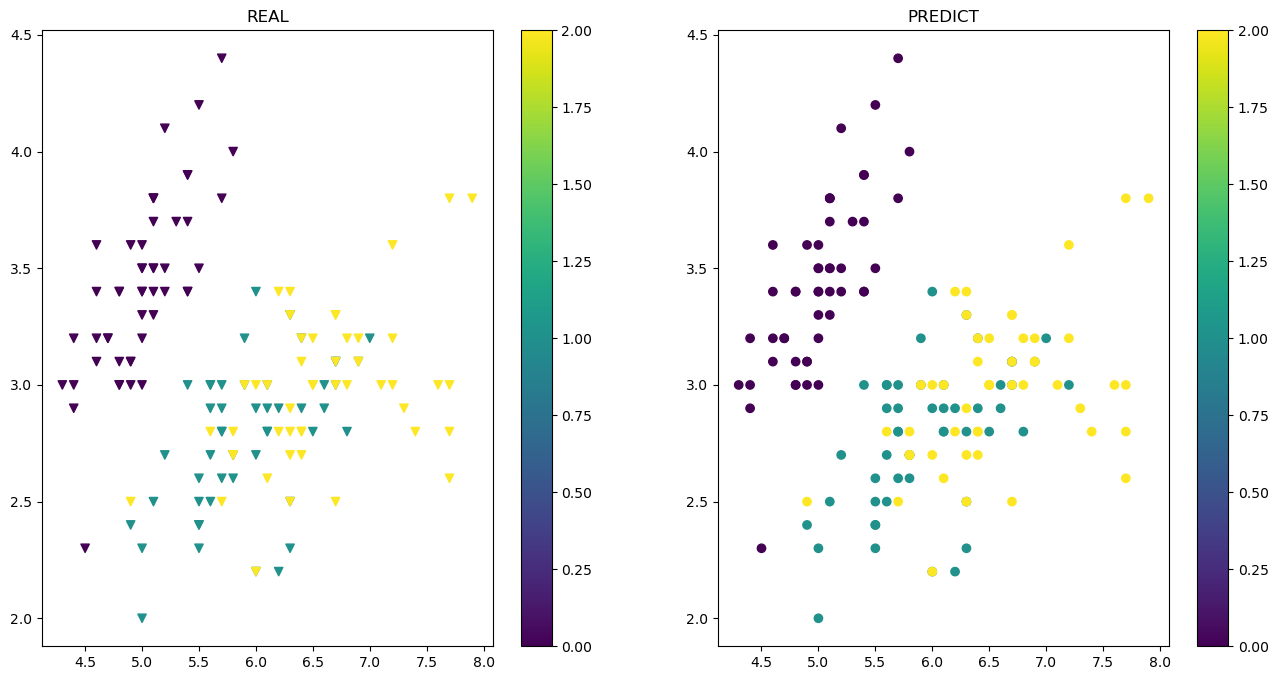

In [2]:
import numpy as np
import torch
import torch.optim as optim
import torchbnn as bnn
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

# Load Iris dataset
dataset = datasets.load_iris()
data = dataset.data
target = dataset.target

# Convert dataset to PyTorch tensors
data_tensor = torch.from_numpy(data).float()
target_tensor = torch.from_numpy(target).long()

# Define the Bayesian Neural Network model
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=4, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=3)
)

# Define loss functions and optimizer
cross_entropy_loss = nn.CrossEntropyLoss()
klloss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for step in range(3000):
    # Forward pass
    outputs = model(data_tensor)
    cross_entropy = cross_entropy_loss(outputs, target_tensor)
    kl = klloss(model)
    total_cost = cross_entropy + 0.01 * kl
    
    # Backward pass
    optimizer.zero_grad()
    total_cost.backward()
    optimizer.step()

# Final predictions and accuracy calculation
outputs = model(data_tensor)
_, predicted = torch.max(outputs.data, 1)
correct = (predicted == target_tensor).sum()
accuracy = 100 * correct / target_tensor.size(0)

# Final output
cross_entropy = cross_entropy_loss(outputs, target_tensor)
kl = klloss(model)
print(f"Final Accuracy: {accuracy:.2f}%")
print(f"Final CE: {cross_entropy.item():.2f}, Final KL: {kl.item():.2f}")

# Plot results
def draw_graph(predicted):
    fig = plt.figure(figsize=(16, 8))
    fig_1 = fig.add_subplot(1, 2, 1)
    fig_2 = fig.add_subplot(1, 2, 2)
    
    z1_plot = fig_1.scatter(data[:, 0], data[:, 1], c=target, marker='v')
    z2_plot = fig_2.scatter(data[:, 0], data[:, 1], c=predicted)
    
    plt.colorbar(z1_plot, ax=fig_1)
    plt.colorbar(z2_plot, ax=fig_2)
    
    fig_1.set_title("REAL")
    fig_2.set_title("PREDICT")
    plt.show()

# Final predictions and plot
draw_graph(predicted)



Accuracy: 97.33%
Cross-Entropy: 0.10, KL: 5.02


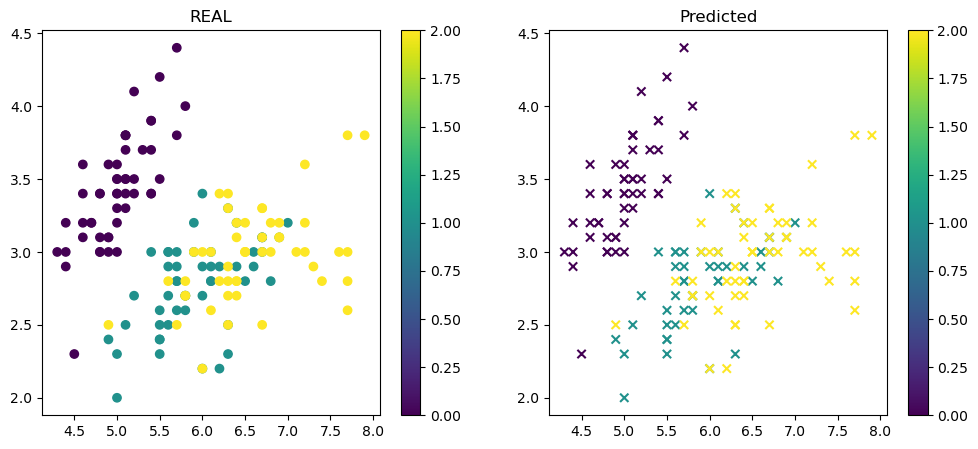

In [19]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = torch.tensor(iris.data, dtype=torch.float32)
y = torch.tensor(iris.target, dtype=torch.long)

# Define a simple Bayesian Neural Network
model = nn.Sequential(
   # bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=4, out_features=50),
    bnn.BayesLinear(0,0.1,4,50),
    nn.ReLU(),
    bnn.BayesLinear(0,0.1,50,3)
   # bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=50, out_features=3)
)

# Losses and optimizer
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
for epoch in range(1000):  # fewer steps to make it faster
    outputs = model(X)
    ce = ce_loss(outputs, y)
    kl = kl_loss(model)
    loss = ce + 0.01 * kl
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluate
with torch.no_grad():
    preds = model(X)
    _, predicted = torch.max(preds, 1)
    accuracy = (predicted == y).float().mean() * 100
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Cross-Entropy: {ce.item():.2f}, KL: {kl.item():.2f}")

# Plot real vs predicted
def draw_plot():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    p1 = ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o')
    p2 = ax2.scatter(X[:, 0], X[:, 1], c=predicted, cmap='viridis', marker='x')

    ax1.set_title("REAL")
    ax2.set_title("Predicted")

    fig.colorbar(p1, ax=ax1)
    fig.colorbar(p2, ax=ax2)
    plt.show()

draw_plot()
